In [6]:
%%capture
!pip install xgboost
!pip install yahooquery

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from yahooquery import Ticker
import calendar

In [2]:
s32 = Ticker('S32.AX')

In [3]:
data = s32.history(period='5y').reset_index()
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')

In [4]:
data

,symbol,date,open,high,low,close,volume,adjclose,dividends
0,S32.AX,2018-03-12,3.28,3.305,3.235,3.24,25681243,2.871441,0.000000
1,S32.AX,2018-03-13,3.24,3.250,3.155,3.18,20341957,2.818266,0.000000
2,S32.AX,2018-03-14,3.17,3.180,3.140,3.18,21931336,2.818266,0.000000
3,S32.AX,2018-03-15,3.18,3.210,3.145,3.20,24943718,2.835992,0.000000
4,S32.AX,2018-03-16,3.22,3.400,3.220,3.38,66149432,2.995516,0.000000
...,...,...,...,...,...,...,...,...,...
1262,S32.AX,2023-03-07,4.65,4.670,4.590,4.63,16814055,4.557805,0.000000
1263,S32.AX,2023-03-08,4.53,4.550,4.490,4.53,13512430,4.459364,0.000000
1264,S32.AX,2023-03-09,4.50,4.500,4.420,4.48,21271780,4.480000,0.070636
1265,S32.AX,2023-03-10,4.40,4.420,4.300,4.33,17111410,4.330000,0.000000


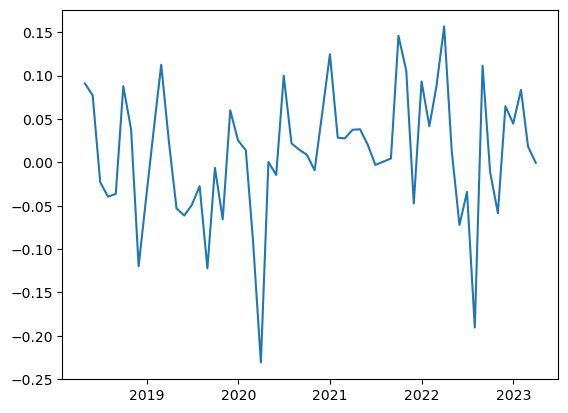

In [5]:
df = data.groupby(pd.Grouper(key='date', axis=0, freq='M')).mean().pct_change()

plt.plot(df.index, df['adjclose'])

<BarContainer object of 7 artists>

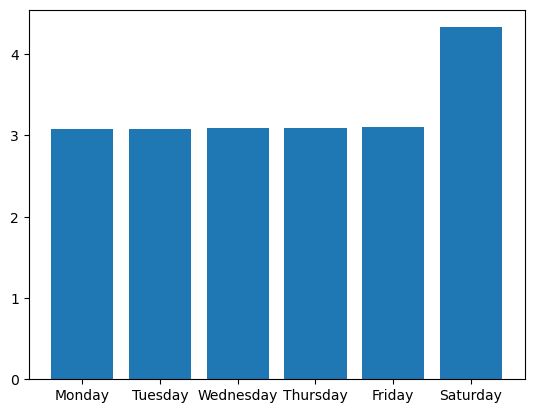

In [6]:
days = list(calendar.day_name)
days_data = data.groupby(data['date'].dt.day_name()).mean().reindex(days)

plt.bar(days, days_data['adjclose'])

<BarContainer object of 7 artists>

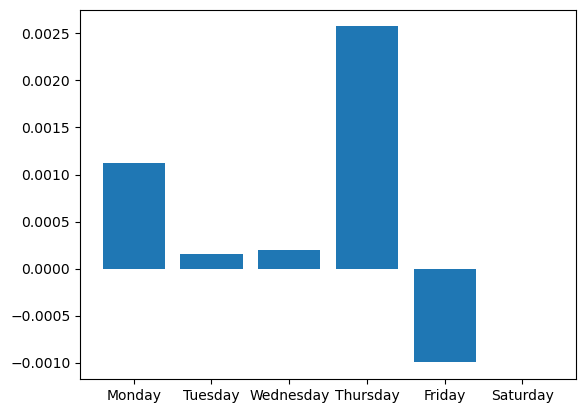

In [7]:
days = list(calendar.day_name)
data['change'] = data['adjclose'].pct_change()
days_data = data.groupby(data['date'].dt.day_name()).mean().reindex(days)

plt.bar(days, days_data['change'])

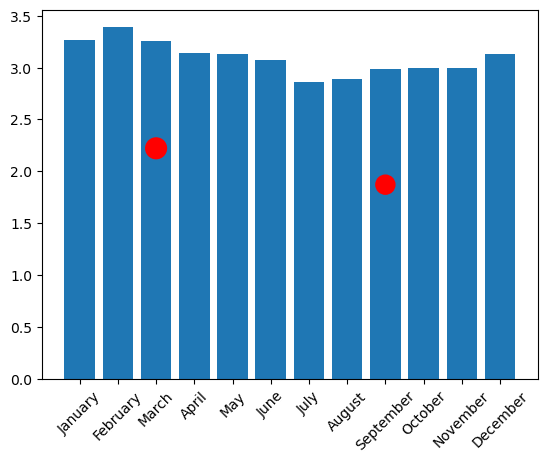

In [8]:
months = list(calendar.month_name)[1:]
months_data = data.groupby(data['date'].dt.month_name()).mean().reindex(months)

plt.bar(months, months_data['adjclose'])
dividend_marker_size = months_data['dividends']*100000
plt.scatter(months_data.index, months_data['dividends']*1000, s=dividend_marker_size, color='red')
plt.xticks(rotation=45)
plt.show()

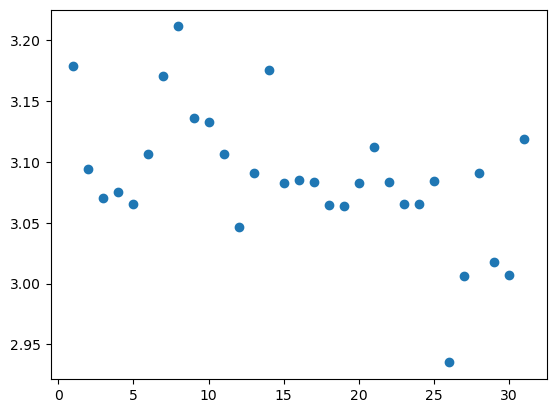

In [9]:
day_month_data = data.groupby(data['date'].dt.day).mean()

plt.scatter(day_month_data.index, day_month_data['adjclose'])
plt.show()


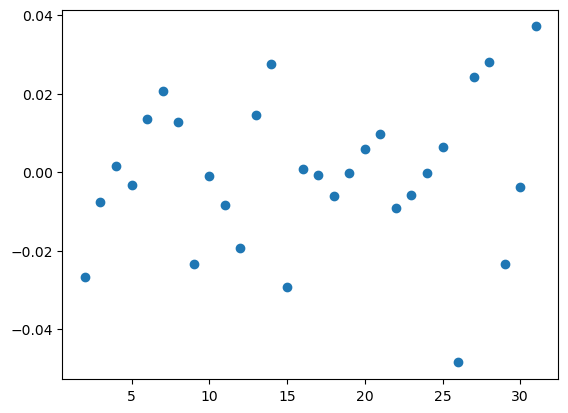

In [10]:
day_month_data = data.groupby(data['date'].dt.day).mean().pct_change()

plt.scatter(day_month_data.index, day_month_data['adjclose'])
plt.show()

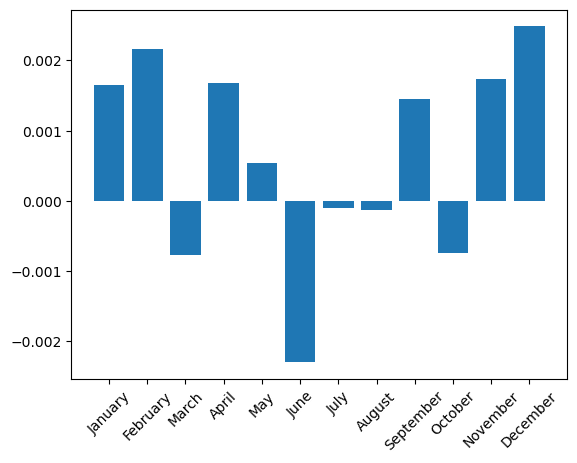

In [11]:
months = list(calendar.month_name)[1:]
data['change'] = data['adjclose'].pct_change()
months_data = data.groupby(data['date'].dt.month_name()).mean().reindex(months)

plt.bar(months, months_data['change'])
plt.xticks(rotation=45)
plt.show()

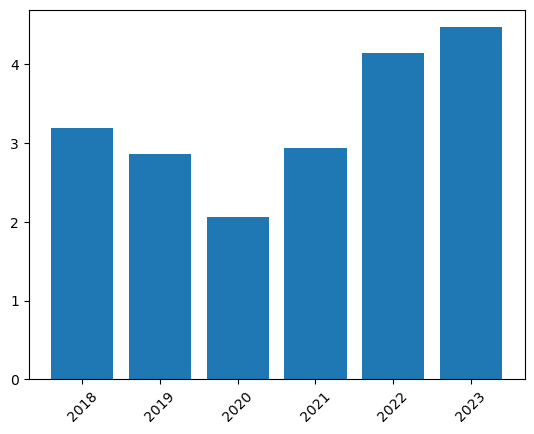

In [12]:
years_data = data.groupby(data['date'].dt.year).mean()

plt.bar(years_data.index, years_data['adjclose'])
plt.xticks(rotation=45)
plt.show()

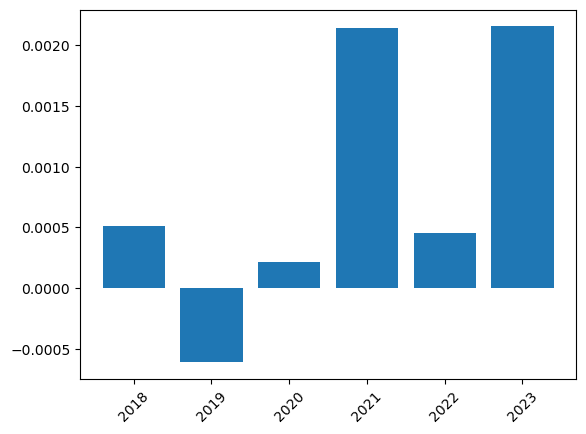

In [13]:
data['change'] = data['adjclose'].pct_change()
years_data = data.groupby(data['date'].dt.year).mean()

plt.bar(years_data.index, years_data['change'])
plt.xticks(rotation=45)
plt.show()

## Feature selection

In [14]:
from fastai.tabular import add_datepart

In [15]:
stripped_data = data[['date', 'adjclose']].copy()

In [16]:
df_feat = add_datepart(stripped_data, 'date', drop=False).drop('Elapsed', axis=1)

D:\anaconda3\lib\site-packages\fastai\tabular\transform.py:63: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  for n in attr: df[prefix + n] = getattr(field.dt, n.lower())


In [17]:
df_feat['Is_month_end'] = df_feat['Is_month_end'].astype(int)

In [18]:
object_list = ['Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start']

for column in object_list:
    df_feat[column] = df_feat[column].astype(int)

In [19]:
df_feat.dtypes

date                datetime64[ns]
adjclose                   float64
Year                         int64
Month                        int64
Week                         int64
Day                          int64
Dayofweek                    int64
Dayofyear                    int64
Is_month_end                 int32
Is_month_start               int32
Is_quarter_end               int32
Is_quarter_start             int32
Is_year_end                  int32
Is_year_start                int32
dtype: object

<AxesSubplot:>

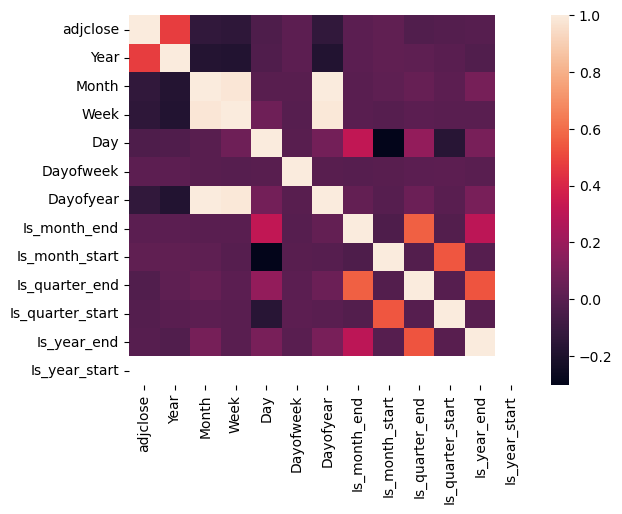

In [20]:
sns.heatmap(df_feat.drop(columns=['date']).corr())

In [21]:
data

,symbol,date,open,high,low,close,volume,adjclose,dividends,change
0,S32.AX,2018-03-12,3.28,3.305,3.235,3.24,25681243,2.871441,0.000000,NaN
1,S32.AX,2018-03-13,3.24,3.250,3.155,3.18,20341957,2.818266,0.000000,-0.018518
2,S32.AX,2018-03-14,3.17,3.180,3.140,3.18,21931336,2.818266,0.000000,0.000000
3,S32.AX,2018-03-15,3.18,3.210,3.145,3.20,24943718,2.835992,0.000000,0.006289
4,S32.AX,2018-03-16,3.22,3.400,3.220,3.38,66149432,2.995516,0.000000,0.056250
...,...,...,...,...,...,...,...,...,...,...
1262,S32.AX,2023-03-07,4.65,4.670,4.590,4.63,16814055,4.557805,0.000000,-0.019068
1263,S32.AX,2023-03-08,4.53,4.550,4.490,4.53,13512430,4.459364,0.000000,-0.021598
1264,S32.AX,2023-03-09,4.50,4.500,4.420,4.48,21271780,4.480000,0.070636,0.004627
1265,S32.AX,2023-03-10,4.40,4.420,4.300,4.33,17111410,4.330000,0.000000,-0.033482


In [22]:
from datetime import datetime
from dateutil.relativedelta import relativedelta

In [23]:
def data_split(df, split_points, filter=True):
    """
    split_points requires an iterable of months.
    """
    TODAY = datetime.today()
    split_dates = [TODAY.strftime('%Y-%m-%d')] + [(TODAY + relativedelta(months=-split)).strftime('%Y-%m-%d') for split in split_points]
    split_frames = [data.loc[(data['date'] < split_dates[i]) & (data['date'] >= split_dates[i + 1])] for i in range(len(split_dates) - 1)]
    
    if (filter == True) & (len(split_points) == 3):
        split_frames[1] = split_frames[1].loc[split_frames[1]['date'].dt.dayofweek == 0]
        split_frames[2] = split_frames[2].loc[split_frames[2]['date'].dt.is_month_start == True]
        
    if (filter == True) & (len(split_points) == 4):
        split_frames[1] = split_frames[1].loc[split_frames[1]['date'].dt.dayofweek == 0]
        split_frames[2] = split_frames[2].loc[split_frames[2]['date'].dt.is_month_start == True]
        split_frames[3] = split_frames[3].loc[split_frames[3]['date'].dt.is_year_start == True]
    
    return split_frames

In [24]:
filtered_data = data_split(data, [3,12,48], filter=True)[-1]

In [ ]:
#Enconder



In [91]:
data.columns

Index(['symbol', 'date', 'open', 'high', 'low', 'close', 'volume', 'adjclose',
       'dividends'],
      dtype='object')

# Try 2

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nsepy import get_history
from datetime import date
from nsepy.history import get_price_list,get_indices_price_list
import datetime as dt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,10
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from xgboost import plot_importance
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV,KFold
from ta.momentum import RSIIndicator,StochasticOscillator
from fastai.tabular import add_datepart
import seaborn as sns
import altair as alt
sns.set()
%matplotlib inline

#remove warnings
import warnings
warnings.filterwarnings('ignore')

In [89]:
data

,symbol,date,open,high,low,close,volume,adjclose,dividends
0,S32.AX,2018-03-12,3.28,3.305,3.235,3.24,25681243,2.871442,0.000000
1,S32.AX,2018-03-13,3.24,3.250,3.155,3.18,20341957,2.818267,0.000000
2,S32.AX,2018-03-14,3.17,3.180,3.140,3.18,21931336,2.818267,0.000000
3,S32.AX,2018-03-15,3.18,3.210,3.145,3.20,24943718,2.835992,0.000000
4,S32.AX,2018-03-16,3.22,3.400,3.220,3.38,66149432,2.995516,0.000000
...,...,...,...,...,...,...,...,...,...
1261,S32.AX,2023-03-06,4.81,4.820,4.675,4.72,19219962,4.646401,0.000000
1262,S32.AX,2023-03-07,4.65,4.670,4.590,4.63,16814055,4.557805,0.000000
1263,S32.AX,2023-03-08,4.53,4.550,4.490,4.53,13512430,4.459364,0.000000
1264,S32.AX,2023-03-09,4.50,4.500,4.420,4.48,21271780,4.480000,0.070636


In [27]:
data_new=filtered_data.copy()
add_datepart(data_new, 'date', drop=False)
data_new.drop('Elapsed', axis=1, inplace=True)

In [132]:
def featurecalculator(share):
  share['EMA_9'] = share['adjclose'].ewm(9).mean() # exponential moving average of window 9
  share['SMA_5'] = share['adjclose'].rolling(5).mean() # moving average of window 5
  share['SMA_10'] = share['adjclose'].rolling(10).mean() # moving average of window 10
  share['SMA_15'] = share['adjclose'].rolling(15).mean() # moving average of window 15
  share['SMA_20'] = share['adjclose'].rolling(20).mean() # moving average of window 20
  share['SMA_25'] = share['adjclose'].rolling(25).mean() # moving average of window 25
  share['SMA_30'] = share['adjclose'].rolling(30).mean() # moving average of window 30
  EMA_12 = pd.Series(share['adjclose'].ewm(span=12, min_periods=12).mean())
  EMA_26 = pd.Series(share['adjclose'].ewm(span=26, min_periods=26).mean())
  share['MACD'] = pd.Series(EMA_12 - EMA_26)    # calculates Moving Average Convergence Divergence
  share['RSI'] = RSIIndicator(share['adjclose']).rsi() # calculates Relative Strength Index 
  share['Stochastic']=StochasticOscillator(share['high'],share['low'],share['adjclose']).stoch() # Calculates Stochastic Oscillator
  pass

In [43]:
def labelencode(share):
  LE=LabelEncoder()
  share['Is_month_end']=LE.fit_transform(share['Is_month_end'])
  share['Is_month_start']=LE.fit_transform(share['Is_month_start'])
  share['Is_quarter_end']=LE.fit_transform(share['Is_quarter_end'])
  share['Is_quarter_start']=LE.fit_transform(share['Is_quarter_start'])
  share['Is_year_end']=LE.fit_transform(share['Is_year_end'])
  share['Is_year_start']=LE.fit_transform(share['Is_year_start'])
  pass

In [133]:
featurecalculator(data_new)

In [134]:
data_new[['EMA_9', 'SMA_5', 'SMA_10', 'SMA_15','SMA_20', 'SMA_25', 'SMA_30', 'MACD', 'RSI', 'Stochastic']]=data_new[['EMA_9', 'SMA_5', 'SMA_10', 'SMA_15',
       'SMA_20', 'SMA_25', 'SMA_30', 'MACD', 'RSI', 'Stochastic']].shift(-1)

In [36]:
#data_new.drop(columns=['symbol', 'date', 'open', 'high', 'low', 'close','dividends', 'change'], inplace=True)


,volume,adjclose,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start
267,20169581,3.425513,2019,4,14,1,0,91,False,True,False,True,False,False
286,8656621,3.041855,2019,5,18,1,2,121,False,True,False,False,False,False
328,13965645,2.923104,2019,7,27,1,0,182,False,True,False,True,False,False
351,12279405,2.831757,2019,8,31,1,3,213,False,True,False,False,False,False
394,18496620,2.456977,2019,10,40,1,1,274,False,True,False,True,False,False


In [39]:
data_new = data_new.reset_index()
data_new.head()

,index,volume,adjclose,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start
0,267,20169581,3.425513,2019,4,14,1,0,91,False,True,False,True,False,False
1,286,8656621,3.041855,2019,5,18,1,2,121,False,True,False,False,False,False
2,328,13965645,2.923104,2019,7,27,1,0,182,False,True,False,True,False,False
3,351,12279405,2.831757,2019,8,31,1,3,213,False,True,False,False,False,False
4,394,18496620,2.456977,2019,10,40,1,1,274,False,True,False,True,False,False


In [32]:
data_new.columns

Index(['symbol', 'date', 'open', 'high', 'low', 'close', 'volume', 'adjclose',
       'dividends', 'change', 'Year', 'Month', 'Week', 'Day', 'Dayofweek',
       'Dayofyear', 'Is_month_end', 'Is_month_start', 'Is_quarter_end',
       'Is_quarter_start', 'Is_year_end', 'Is_year_start'],
      dtype='object')

In [40]:
# Splitting the dataset into 70% training, 15% validation and 15% test
# train test split indexes
test_size  = 0.15
valid_size = 0.15

test_split_idx  = int(data_new.shape[0] * (1-test_size))
valid_split_idx = int(data_new.shape[0] * (1-(valid_size+test_size)))  


#train test split tcs

train= data_new.loc[:valid_split_idx]
valid= data_new.loc[valid_split_idx+1:test_split_idx]
test= data_new.loc[test_split_idx+1:]

In [41]:
y_train = train['adjclose']
X_train = train.drop(['adjclose'], 1)

y_valid = valid['adjclose']
X_valid = valid.drop(['adjclose'], 1)

y_test = test['adjclose']
X_test = test.drop(['adjclose'], 1)

In [137]:
data_new = data_new.drop(['date', 'symbol', 'open', 'high', 'low', 'close', 'volume', 'dividends'],axis=1)

In [44]:
labelencode(data_new)

In [45]:
data_new.dtypes

index                 int64
volume                int64
adjclose            float64
Year                  int64
Month                 int64
Week                  int64
Day                   int64
Dayofweek             int64
Dayofyear             int64
Is_month_end          int64
Is_month_start        int64
Is_quarter_end        int64
Is_quarter_start      int64
Is_year_end           int64
Is_year_start         int64
dtype: object

In [47]:
parameters = {
    'n_estimators': [350],
    'learning_rate': [0.1],
    'max_depth': [6],
    'gamma': [0.01],
    'random_state': [42],
    'min_child_weight':[5],
    'subsample':[0.8],
    'colsample_bytree':[1],
    'colsample_bylevel':[1]
}
kfold=KFold(5)
eval_set = [(X_train, y_train), (X_valid, y_valid)]
model = XGBRegressor(objective='reg:squarederror',n_jobs=-1)
clf = GridSearchCV(model, parameters,cv=kfold,scoring='neg_mean_absolute_error',verbose=0)

clf.fit(X_train, y_train)

print(f'Best params: {clf.best_params_}')
print(f'Best validation score = {clf.best_score_}')

Best params: {'colsample_bylevel': 1, 'colsample_bytree': 1, 'gamma': 0.01, 'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 5, 'n_estimators': 350, 'random_state': 42, 'subsample': 0.8}
Best validation score = -0.5254205524921417


In [49]:
model = XGBRegressor(**clf.best_params_, objective='reg:squarederror',n_jobs=-1)
model.fit(X_train, y_train, eval_set=eval_set, verbose=False)
y_pred=model.predict(X_test)
mean_absolute_error(y_test,y_pred)

1.5936099290847778

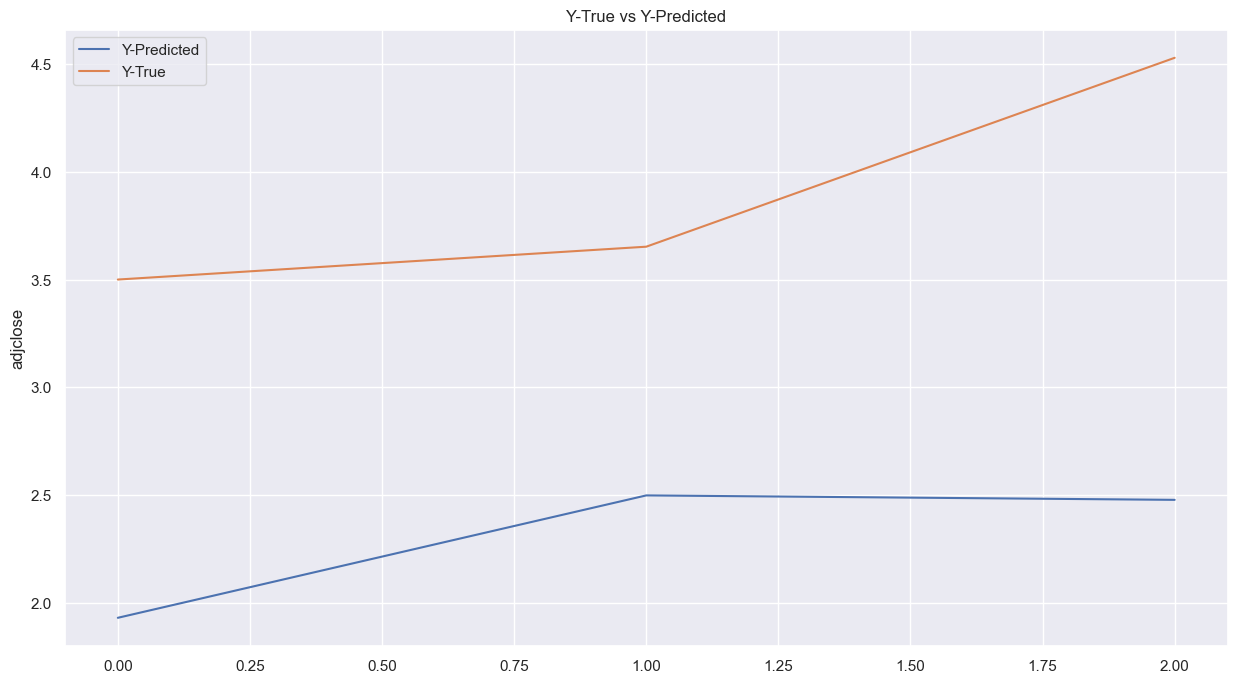

In [50]:
plt.figure(figsize=(15,8))
sns.lineplot(y=y_pred,x=np.arange(len(y_pred)))
sns.lineplot(y=y_test,x=np.arange(len(y_pred)))
plt.legend(['Y-Predicted','Y-True'])
plt.title('Y-True vs Y-Predicted')
plt.show()

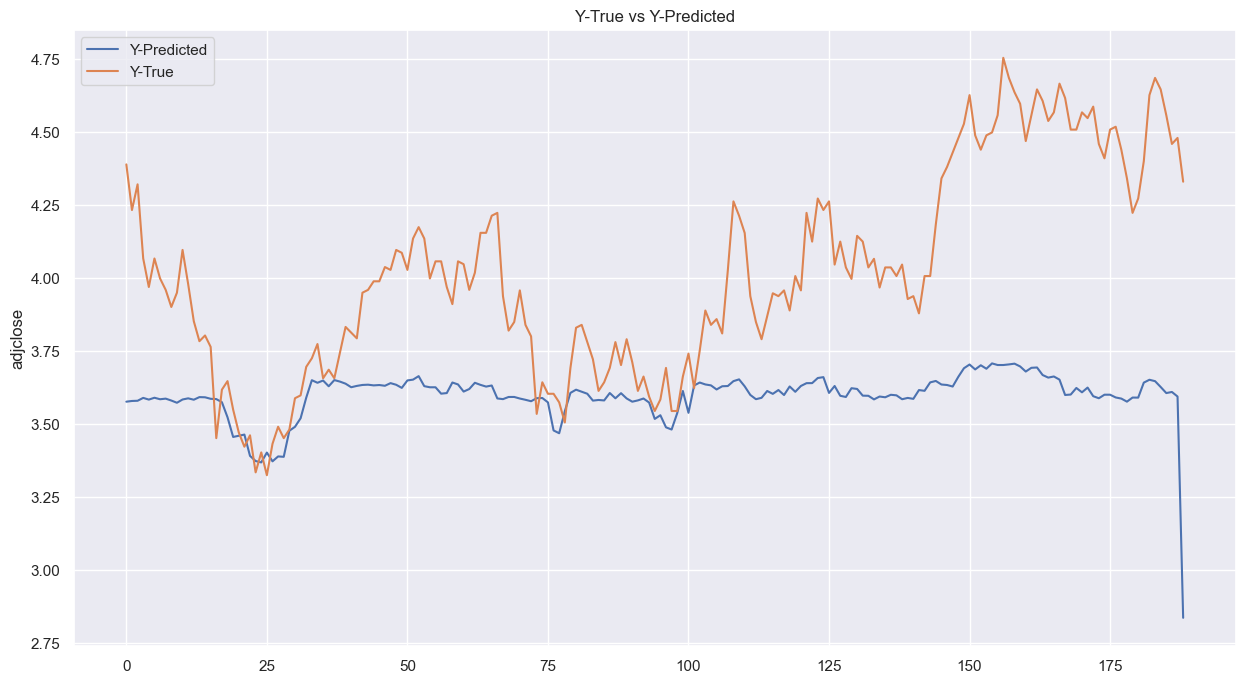

In [157]:
plt.figure(figsize=(15,8))
sns.lineplot(y=y_pred,x=np.arange(len(y_pred)))
sns.lineplot(y=y_test,x=np.arange(len(y_pred)))
plt.legend(['Y-Predicted','Y-True'])
plt.title('Y-True vs Y-Predicted')
plt.show()

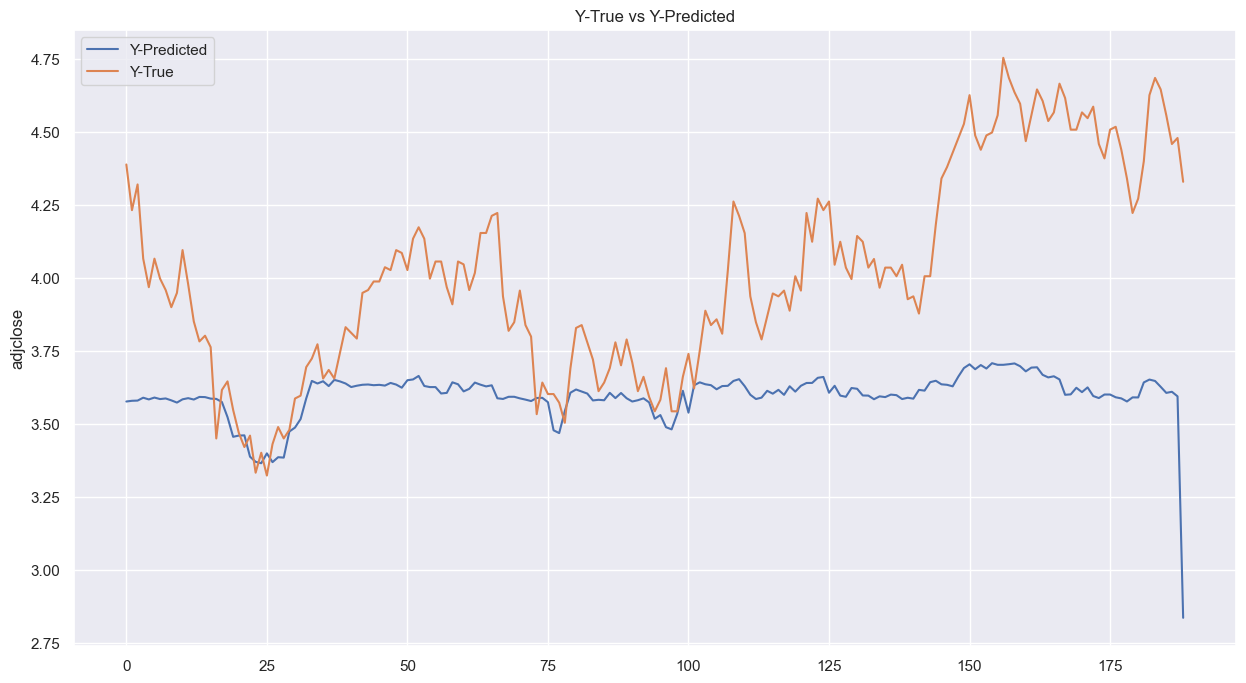

In [160]:
plt.figure(figsize=(15,8))
sns.lineplot(y=y_pred,x=np.arange(len(y_pred)))
sns.lineplot(y=y_test,x=np.arange(len(y_pred)))
plt.legend(['Y-Predicted','Y-True'])
plt.title('Y-True vs Y-Predicted')
plt.show()